(timestepping_ode)=
# Solving or timestepping an ODE
```{index} Timestepping an ODE
```
## What is timestepping?

The numerical solution of ordinary differential equations (ODEs) is a big topic. A common type of ODE you will come across will only include a first derivative with respect to an independent variable. This won't necessarily be time \\(t\\) (it might be space \\(x\\)), but we can always "interpret" this indepedent as "time" or a time-like variable. This is why we commonly talk about **"timestepping"** an ODE even though there are lots of scenarios where you will be doing this for problems either where \\(t\\) doesn't appear, or isn't the variable the derivative has been taken with respect to!

```{admonition} What would you do with a problem that includes higher than first order derivative? 
:class: dropdown
An example comes from Newton's second law, which tells us about acceleration (or rate of change of momentum), but we want to solve for position (\\(x\\)), i.e. we're thinking about an ODE in the form \\(\ddot{x}=f\\).  Well we can always convert higher order problems into a system of ODEs only involving first order derivatives by introducing "dummy" variables. In the Newton's second law example just introduce velocity, then we can rewrite our second order problem \\(\ddot{x}=f\\) as the coupled first order problem \\(\dot{x}=u,\dot{u}=f\\). An example of how to simplify a second order derivative can be found in {ref}`here <nm_runge_kutta_higher_order_ode>`.
```

```{margin} Note
On the LHS we could also use the notation \\(\dot{u}\\) or \\(\frac{du}{dt}\\).
```
Let's suppose we have an ODE of the form

\\[u' = f(t,u).\\]

This is describing a solution function of the form \\(y\equiv u(t)\\), i.e. the solution \\(u\\) is a function of one variable - \\(t\\).

\\(u\\) is called the **dependent variable** and \\(t\\) the **independent variable**.

```{margin} Note
In the case where \\(u\\) is multi-dimensional - a vector of unknowns/dependent variables - we would talk about a system of ODEs. For the case where there are more than one independent variables then we need to start thinking about partial differential equations (PDEs).
```

For example,

\\[u' = \exp(t), \qquad\text{or equivalently} \qquad u' = u,\\]

where first example shows the RHS as a function of \\(t\\) only, the second a function of \\(u\\) only. 

This is an example where both \\(t\\) and \\(u\\) appear on the RHS:

\\[u' = u + t^3.\\]

The first two examples are relatively easy for us to solve analytically, the final case is a bit more challenging and we may need to resort to a numerical approach (or attempt symbolic computation).

(nm_euler_method)=
## Forward Euler scheme
```{index} Forward Euler scheme
```
### Taylor series derivation

There are several approached to motivate and develop numerical solvers for ODEs. One common way is to make use of a Taylor series expansion.

From the notebook on {ref}Taylor series <taylor_series> we know that (assuming smoothness of the solution) the following is true:

\\[ u(t+\Delta t) = u(t) + \Delta t  u'(t) + \frac{\Delta t^2}{2!}u''(t) + \frac{\Delta t^3}{3!}u'''(t) + \mathcal{O}(\Delta t^4).\\]
 
Using the notation \\(u_n=u(t_n)\\), \\(u'_n=u'(t_n)\\) etc, and assuming a uniform time step size \\(\Delta t\\), this is equivalent to 

\\[ u_{n+1} = u_n + \Delta t u'_n + \frac{\Delta t^2}{2!}u''_n + \frac{\Delta t^3}{3!}u'''_n + \mathcal{O}(\Delta t^4).\\]

Dropping second-order terms (which we can justify if \\(u\\) is "smooth", which means that \\(u''\\) is "well-behaved", and \\(\Delta t\\) is chosen to be sufficiently small so that the terms containing higher powers of \\(\Delta t\\) are relatively speaking very small), 

and noting that \\(u'_n = f(t_n,y_n)\\) we are left with the discrete relation

\\[u_{n+1} = u_n + \Delta t f(t_n,y_n).\\]

This is a very famous ODE solver, or time-stepping method - termed the [**forward Euler**](https://en.wikipedia.org/wiki/Euler_method) or **explicit Euler** method. We have turned the continuous problem into a discrete one, hence we have discretised it.

Euler method is known as an explicit method, because the function \\(f\\) in this relation is evaluated at the old time level \\(t\\), i.e. we have all the information required at time \\(t\\) to explicitly compute the right-hand-side,
and hence easily find the new value for \\(u(t+\Delta t)\\).

To illustrate Euler's method, and convey the fundamental idea of all time stepping methods, we'll use Euler's method to solve one of the simplest of all ODEs:

\\[ u'(t)=u(t),\\\\\\
u(0)=1.\\]

We know that at \\(t = 0\\), \\(u(t=0) = 1\\). We also know that \\(u'(t)=u(t)\\) and thus \\(u'(t=0)=u(t=0)\\).

Since \\(u(t=0)=1\\), then \\(u'(t=0) = 1\\). We can use that to substitute to the Euler scheme.

To obtain \\(u(t+\Delta t)\\), we have timestep \\(\Delta t = 0.05\\) and \\(u(t=0) = 1\\) and \\(u'(t=0) = 1\\):

\\[u(t+\Delta t)=u(t)+ \Delta t f(u(t),t).\\]

We know that the solution to this equation is \\(u(t)=e^t\\), but let's ignore that for one moment and evaluate \\(u(0.1)\\) using Euler's method with steps of \\(0.05\\). The first step is:

\\[u(0.05)\approx u(0)+0.05u'(0)\approx 1+0.05\times 1 =1.05.\\]

Here, we found that \\(u\\) is 1.05, but actually \\(e^{0.05} = 1.05127\\), thus we have more than the actual value by a small percentage of 0.12%. This 0.12% error comes from the truncation error from us dropping \\(O(\Delta t^2)\\) from our calculation.

Now that we know \\(u(0.05)\\), we can calculate the second step. We know that at \\(t = 0.05\\), \\(u(t=0.05) = 1.05\\)

We also know that \\(u'(t)=u(t)\\) and thus \\(u'(t=0.05)=u(t=0.05)\\).

Since \\(u(t=0.05)=1.05\\), then \\(u'(u = 1.05, t=0.05) = 1.05\\).

We can then use what we obtained to substitute into the Euler scheme. To obtain \\(u(t+\Delta t)\\), we have timestep \\(\Delta t = 0.05\\) and \\( u(t=0.05) = 1.05\\) and \\(u'(u=1.05, t=0.05) = 1.05\\):

\\[u(0.1)\approx u(0.05)+0.05u'(0.05)=1.05+.05\times1.05=1.1025.\\]

Now the actual value of \\(e^{0.1}\\) is around \\(1.1051\\) so we're 0.236% higher and only 2 steps into the algorithm. The 0.236% comes from the truncation error when we went from 0 to 0.05, and the truncation error when we went from 0.05 to 0.10. Note that the truncation errors are compounded. The truncation error from 0 to 0.05 will result in greater truncation error when going from 0.05 to 0.10. These truncation errors are cumulative, and old truncation errors result in greater new truncation errors, which makes them quickly become rather significant. 

The formula given is used to calculate the value of \\(u(t)\\) one time step forward from the last known value. The error is therefore the local truncation error. If we actually wish to know the value at some fixed time \\(T\\) then we will have to calculate \\((T-t_0)/h\\) steps of the method, since the distance from \\(T\\) to \\(t_0\\) is \\(T-t_0\\) and the length of each step is \\(h\\). This sum over \\(O(1/\Delta t)\\) steps results in a global truncation error for Euler's method of \\(O(\Delta t)\\).

In other words, Euler's method is only **1st order accurate** - if we halve \\(\Delta t\\) we will need to do double the amount of work and the error should correspondingly halve.


### Graphical representation

Let's consider the simple model problem 

\\[y' = y\\]

with the initial condition

\\[y(0)=1\\]

and see what one step of the forward Euler method does, we will assume that we start at some \\(t\\) from the exact solution at that time, i.e. the starting point indicated by the red dot in the following image is on the exact solution (black) line:

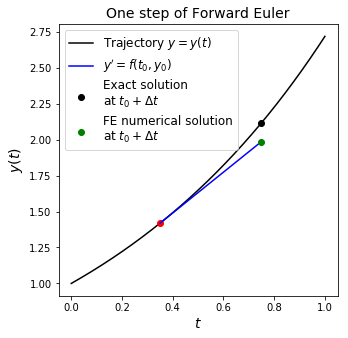

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(111)
ax1.set_title('One step of Forward Euler', fontsize=14)
ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('$y(t)$', fontsize=14)

t = np.linspace(0, 1, 1000)

# the RHS of the ODE
def f(t,y):
    return y

# an example solution trajectory (or solution to ODE $\dot{y}=f(y), y(0)=1$)
def y(t):
    return np.exp(t)

ax1.plot(t, y(t), 'k', label='Trajectory $y=y(t)$')

# this is just some location in time
t0 = 0.35
# and an example of a time step size large enough we can see what the method is doing
dt = 0.4

ax1.plot([t0], [y(t0)], 'ro')
ax1.plot([t0, t0 + dt], [y(t0), y(t0) + dt * f(t0, y(t0))], 'b', label = r"$y'=f(t_0,y_0)$")

ax1.plot([t0 + dt], [y(t0 + dt)], 'ko', label='Exact solution\nat $t_0 + \Delta t$')
ax1.plot([t0 + dt], [y(t0) + dt * f(t0, y(t0))], 'go', label='FE numerical solution\nat $t_0 + \Delta t$')
ax1.legend(loc='best', fontsize=12)

plt.show()

The black dot in the figure above shows what the true/exact solution at the new $n$ level is, while the green dot shows what the numerical solver predicts it to be. The difference between the two is the error that has been introduced in a single step of the method.

In the next step of the algorithm we have to start from the green dot as we don't know the black line in practice.  

The next step computes

\\[u_{n+1} = u_n + \Delta t f(t_n,u_n),\\]

but note that \\(f\\) for this particular simple test case is simply \\(u\\). 

We assume that we don't know what the exact solution is at this time level, and hence we can't read off the correct \\(t\\) from the \\(x\\) axis in the above plot and compute \\(\exp(t)\\) in the RHS of our update. If we could then this would let us use the correct new slope at this time, i.e. the slope at the black dot.  

Instead we are forced to read off the \\(u\\) axis - notice that in this example this gives us a \\(u\\) value that is too small, and hence an \\(f\\) that is too small. Therefore our next update will give us a second point that is even more too small.

The moral of the story here is that **errors generally accumulate**, as we can see if we plot this next step of the algorithm:

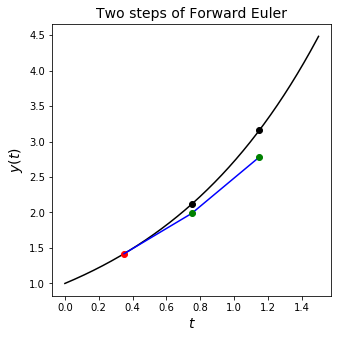

In [6]:
fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(111)
ax1.set_title('Two steps of Forward Euler', fontsize=14)
ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('$y(t)$', fontsize=14)

t = np.linspace(0, 1.5, 1000)

# the RHS of the ODE
def f(t,y):
    return y

# an example solution trajectory (or solution to ODE $\dot{y}=f(y), y(0)=1$)
def y(t):
    return np.exp(t)


ax1.plot(t, y(t), 'k', label='Trajectory $y=y(t)$')

# this is just some location in time
t0 = 0.35
# and an example of a time step size large enough we can see what the method is doing
dt = 0.4


ax1.plot([t0], [y(t0)], 'ro')
ax1.plot([t0, t0 + dt], [y(t0), y(t0) + dt * f(t0, y(t0))], 'b')
y1 = y(t0) + dt * f(t0, y(t0))
ax1.plot([t0 + dt, t0 + 2*dt], [y1, y1 + dt * f(t0+dt, y1)], 'b')

ax1.plot([t0 + dt, t0+2*dt], [y(t0 + dt), y(t0+2*dt)], 'ko')
ax1.plot([t0 + dt, t0 + 2*dt], [y(t0) + dt * f(t0, y(t0)), y1 + dt * f(t0+dt, y1)], 'go')

plt.show()

### Implementation

We will write a function `euler(f,u0,t0,t_max,dt)` that takes as arguments the function \\(f(u,t)\\) on the RHS of our ODE,
an initial value for \\(u\\), the start and end time of the integration, and the time step.

We will use it to integrate the following ODEs up to time \\(t=10\\)

\\[u'(t)=u(t),\quad u(0)=1\\]

and 

\\[u'(t)=\cos(t),\quad u(0)=0\\]

and plot the results.

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def euler(f,u0,t0,t_max,dt):
    u=u0; t=t0
    # These lists will store all solution values 
    # and associated time levels for later plotting
    u_all=[u0]; t_all=[t0]
    while t<t_max:
        u = u + dt*f(u,t)
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return(u_all,t_all)

def f1(u,t):
    val = u
    return val

def f2(u,t):
    val = np.cos(t)
    return val

Plot the results:

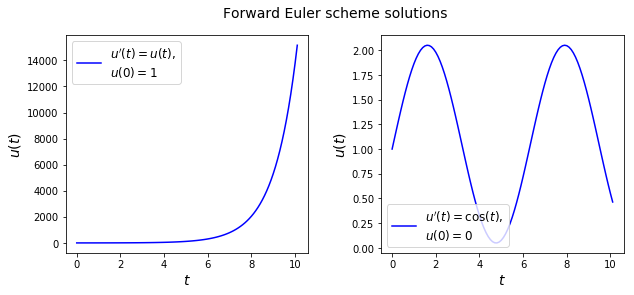

In [39]:
u1, t1 = euler(f1,1.0,0.0,10.0,0.1)
u2, t2 = euler(f2,1.0,0.0,10.0,0.1)

# Set up figure
fig, axes = plt.subplots(1,2, figsize=(10, 4))
ax1 = axes[0]
ax2 = axes[1]

ax1.plot(t1, u1, color="blue",
         label="$u'(t)=u(t)$,\n$u(0)=1$")
ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('$u(t)$', fontsize=14)
ax1.legend(loc="best", fontsize=12)

ax2.plot(t2, u2, color="blue",
         label="$u'(t)=\cos(t)$,\n$u(0)=0$")
ax2.set_xlabel('$t$', fontsize=14)
ax2.set_ylabel('$u(t)$', fontsize=14)
ax2.legend(loc="lower left", fontsize=12)

plt.subplots_adjust(wspace=0.3)
plt.suptitle("Forward Euler scheme solutions", fontsize=14)
plt.show()

If we were to solve these ODEs analytically, the solution for the first one would reveal an exponential function
\\[u(t)=\exp(t),\\]
while the second one would show a sine wave
\\[u(t)=\sin(t)+1.\\]
How do the numerical solutions compare to the analytical solutions?

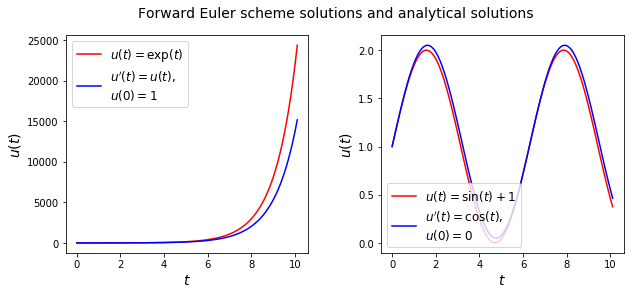

In [50]:
import numpy as np

u1, t1 = euler(f1,1.0,0.0,10.0,0.1)
u2, t2 = euler(f2,1.0,0.0,10.0,0.1)

# Set up figure
fig, axes = plt.subplots(1,2, figsize=(10, 4))
ax1 = axes[0]
ax2 = axes[1]


ax1.plot(t1, np.exp(t1), color="red",
         label="$u(t)=\exp(t)$")
ax1.plot(t1, u1, color="blue",
         label="$u'(t)=u(t)$,\n$u(0)=1$")
ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('$u(t)$', fontsize=14)
ax1.legend(loc="best", fontsize=12)

ax2.plot(t2, np.sin(t2)+1,
        label="$u(t)=\sin(t)+1$", color="red")
ax2.plot(t2, u2, color="blue",
         label="$u'(t)=\cos(t)$,\n$u(0)=0$")
ax2.set_xlabel('$t$', fontsize=14)
ax2.set_ylabel('$u(t)$', fontsize=14)
ax2.legend(loc="lower left", fontsize=12)

plt.subplots_adjust(wspace=0.3)
plt.suptitle("Forward Euler scheme solutions and analytical solutions", fontsize=14)
plt.show()

As we can see, the error grows for the exponential function with time. The sine wave starts similar but eventually it underestimates the peaks and troughs of the analytical solution.